In [ ]:
!wget https://raw.githubusercontent.com/maratonadev/desafio-3-2021/main/assets/data/InsuranceCompanyABC.csv
!wget https://raw.githubusercontent.com/maratonadev/desafio-3-2021/main/assets/data/InvestmentBankCDE.csv
!wget https://raw.githubusercontent.com/maratonadev/desafio-3-2021/main/assets/data/RetailBankEFG.csv
!wget https://raw.githubusercontent.com/maratonadev/desafio-3-2021/main/assets/data/ANSWERS.csv

--2021-12-06 00:58:34--  https://raw.githubusercontent.com/maratonadev/desafio-3-2021/main/assets/data/InsuranceCompanyABC.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 541832 (529K) [text/plain]
Saving to: ‘InsuranceCompanyABC.csv’

InsuranceCompanyABC 100%[===================>] 529.13K  --.-KB/s    in 0.004s  

2021-12-06 00:58:34 (115 MB/s) - ‘InsuranceCompanyABC.csv’ saved [541832/541832]

--2021-12-06 00:58:34--  https://raw.githubusercontent.com/maratonadev/desafio-3-2021/main/assets/data/InvestmentBankCDE.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request se

In [ ]:
import pandas as pd
dfa = pd.read_csv('InsuranceCompanyABC.csv')  
dfb = pd.read_csv('InvestmentBankCDE.csv')  
dfc = pd.read_csv('RetailBankEFG.csv')  

In [ ]:
left = pd.merge(dfa, dfb,how="outer", on="ID")
result = pd.merge(left, dfc,how="outer", on="ID")

In [ ]:
items = [
  "seguro auto",
  "seguro vida Emp",
  "seguro vida PF",
  "Seguro Residencial",
  "Investimento Fundos_cambiais",
  "Investimento Fundos_commodities",
  "Investimento LCI",
  "Investimento LCA",
  "Investimento Poupanca",
  "Investimento Fundos Multimercado",
  "Investimento Tesouro Direto",
  "Financiamento Casa",
  "Financiamento Carro",
  "Emprestimo _pessoal",
  "Emprestimo _consignado",
  "Emprestimo _limite_especial",
  "Emprestimo _educacao",
  "Emprestimo _viagem",
  "Investimento CDB",
  "Investimento Fundos"
]
len(items)

20

In [ ]:
result = result.drop(columns=['ID'], inplace=False)

In [ ]:
result[items] = result[items].replace(dict(T=1, F=0))

In [ ]:
import pandas as pd
# X_train_data = pd.DataFrame({'Idade':[50,20,30,4,5]})
labes = {'1000-6500':1000,'6500-7500':6500,'7000-7500':7000,'7500-8000':7500,'8000-8500':8000,'8500-10000':8500}
labels = list(labes.keys())
bins= list(labes.values())
bins.append(30000)
result['IncomeGroup'] = pd.cut(result['Renda'], bins=bins, labels=labels, right=False)

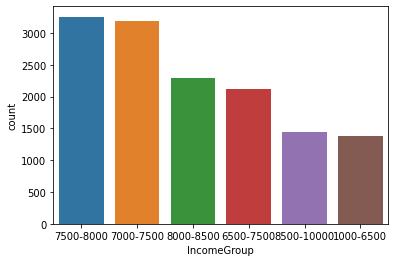

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
risk_plot = sns.countplot(data=result, x='IncomeGroup', order=result['IncomeGroup'].value_counts().index)
plt.show()

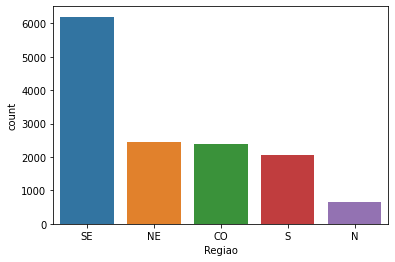

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
risk_plot = sns.countplot(data=result, x='Regiao', order=result['Regiao'].value_counts().index)
plt.show()

In [ ]:
import pandas as pd
# X_train_data = pd.DataFrame({'Idade':[50,20,30,4,5]})
X_train_data = pd.DataFrame()
labes = {'Teen':13,'Adult20s':19,'adult25s':29,'Adult':37,'Adult40s':45,'Adult50s':52,'Old':59}
labels = list(labes.keys())
bins= list(labes.values())
bins.append(150)
result['AgeGroup'] = pd.cut(result['Idade'], bins=bins, labels=labels, right=False)

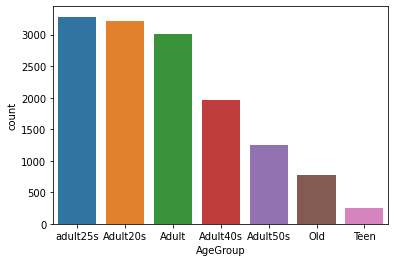

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
risk_plot = sns.countplot(data=result, x='AgeGroup', order=result['AgeGroup'].value_counts().index)
plt.show()

In [ ]:
from mlxtend.frequent_patterns import association_rules, apriori
from sklearn import preprocessing
features_to_label = ['IncomeGroup','AgeGroup','Regiao','Genero']
basketed = pd.get_dummies(result, columns=features_to_label)
basketed.drop(columns=['Idade','Renda'], inplace=True)
frequent_itemsets = apriori(basketed, min_support = 0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric = 'lift',
                          min_threshold = 0.0).sort_values('lift', ascending = False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
658,(Emprestimo _limite_especial),"(Emprestimo _pessoal, Emprestimo _consignado)",0.161326,0.122870,0.119519,0.740858,6.029625,0.099697,3.384745
655,"(Emprestimo _pessoal, Emprestimo _consignado)",(Emprestimo _limite_especial),0.122870,0.161326,0.119519,0.972733,6.029625,0.099697,30.757473
659,(Emprestimo _consignado),"(Emprestimo _pessoal, Emprestimo _limite_espec...",0.160743,0.125346,0.119519,0.743543,5.931929,0.099371,3.410533
654,"(Emprestimo _pessoal, Emprestimo _limite_espec...",(Emprestimo _consignado),0.125346,0.160743,0.119519,0.953515,5.931929,0.099371,18.054518
928,"(Emprestimo _viagem, Investimento Fundos)","(Emprestimo _educacao, Investimento CDB)",0.147633,0.133503,0.115222,0.780464,5.846027,0.095513,3.946941
...,...,...,...,...,...,...,...,...,...
201,(Regiao_SE),(Financiamento Carro),0.451420,0.248361,0.107065,0.237173,0.954953,-0.005050,0.985334
183,(Investimento Fundos Multimercado),(Investimento CDB),0.254406,0.494683,0.117698,0.462640,0.935224,-0.008152,0.940368
182,(Investimento CDB),(Investimento Fundos Multimercado),0.494683,0.254406,0.117698,0.237927,0.935224,-0.008152,0.978376
199,(Investimento CDB),(Financiamento Carro),0.494683,0.248361,0.111362,0.225118,0.906413,-0.011498,0.970004


In [ ]:
rules['antecedents_length'] = rules['antecedents'].apply(lambda x: len(x))

In [ ]:
rules_clean = rules[ (rules['antecedents_length'] <= 5) &
                   (rules['confidence'] >= 0.8)]

In [302]:
class transfor:
  def __init__(self,rules_df,items,rec_count=1):
    self.rules_df = rules_df.sort_values("confidence", ascending=False)
    self.rec_count=rec_count
    self.items = items

  def arl_recommender(self,df):
    sorted_rules = self.rules_df
    recommendation_list = []
    lista = set()
    for h in self.items:
      if df[h] == 1:
        lista.update({h})
    features_to_label = ['IncomeGroup','AgeGroup','Regiao','Genero']
    for t in features_to_label:
      lista.update({t + "_"+str(df[t])})
    filter = sorted_rules[sorted_rules['antecedents'] <= lista]
    for i,tt in filter["antecedents"].items():
      recommendation_list.append(list([[j,filter.loc[i]["confidence"]] for j in filter.loc[i]["consequents"]]))
    recommendation_list = list([item for item_list in recommendation_list for item in item_list])
    recommendation_list.sort(key=lambda x:x[1],reverse=True)
    result =[]
    i = 0
    while (len(result) < self.rec_count) and (i < len(recommendation_list)):
      item,conf =recommendation_list[i]
      if (item in self.items) and not (item in [h for h,k in result]):
        result.append(recommendation_list[i])
      i +=1
    lack = self.rec_count - len(result) 
    if lack > 0:
      result.append([None,None]*lack)
    return [item for sublist in result for item in sublist]

In [229]:
dfans_org = pd.read_csv('ANSWERS.csv')  

In [230]:
dfans = dfans_org.drop(columns=['ID'], inplace=False)
dfans[items] = dfans[items].replace(dict(T=1, F=0))

In [ ]:
def renda(df):
  labes = {'1000-6500':1000,'6500-7500':6500,'7000-7500':7000,'7500-8000':7500,'8000-8500':8000,'8500-10000':8500}
  labels = list(labes.keys())
  bins= list(labes.values())
  bins.append(30000)
  df['IncomeGroup'] = pd.cut(df['Renda'], bins=bins, labels=labels, right=False)
  return df

def idade(df):
  labes = {'Teen':13,'Adult20s':19,'adult25s':29,'Adult':37,'Adult40s':45,'Adult50s':52,'Old':59}
  labels = list(labes.keys())
  bins= list(labes.values())
  bins.append(150)
  df['AgeGroup'] = pd.cut(df['Idade'], bins=bins, labels=labels, right=False)
  return df

In [241]:
dfans = renda(dfans)
dfans = idade(dfans)

In [285]:
trans = transfor(rules_clean,items,3)
reco =['RECOMMENDATION_1','CONFIDENCE_1','RECOMMENDATION_2','CONFIDENCE_2','RECOMMENDATION_3','CONFIDENCE_3']
x = dfans.apply(trans.arl_recommender,axis=1)


In [305]:
dfans_org[reco] = x.values.tolist()

In [307]:
dfans_org.to_csv('ANSWERS2.csv', index=False) 

In [308]:
dfans_org

,ID,Idade,Renda,Regiao,Genero,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,Investimento Fundos_cambiais,Investimento Fundos_commodities,Investimento LCI,Investimento LCA,Investimento Poupanca,Investimento Fundos Multimercado,Investimento Tesouro Direto,Financiamento Casa,Financiamento Carro,Emprestimo _pessoal,Emprestimo _consignado,Emprestimo _limite_especial,Emprestimo _educacao,Emprestimo _viagem,Investimento CDB,Investimento Fundos,RECOMMENDATION_1,CONFIDENCE_1,RECOMMENDATION_2,CONFIDENCE_2,RECOMMENDATION_3,CONFIDENCE_3
0,1004.0,40.685,8474.687,CO,1.0,F,F,F,F,F,T,F,F,F,T,F,F,F,F,F,F,T,F,T,F,Investimento Fundos,0.900164,Emprestimo _viagem,0.883252,Investimento CDB,0.834699
1,1028.0,56.693,7996.353,SE,0.0,F,F,F,F,T,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,None,NaN,None,NaN,None,NaN
2,1034.0,49.413,8624.335,NE,0.0,T,T,T,T,F,F,F,F,F,F,F,F,F,F,F,F,F,F,T,F,Seguro Residencial,0.998156,seguro vida PF,0.990483,seguro auto,0.987231
3,1035.0,22.764,6885.196,S,1.0,F,F,F,T,F,F,F,T,F,F,F,F,F,F,F,F,F,F,F,F,None,NaN,None,NaN,None,NaN
4,1039.0,22.059,7749.965,NE,1.0,T,T,T,T,F,F,F,T,F,F,F,F,F,F,F,F,F,F,F,F,Seguro Residencial,0.998156,seguro vida PF,0.990483,seguro auto,0.987483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,100932.0,28.659,8804.506,S,1.0,F,F,F,F,F,T,T,F,T,F,F,F,F,F,T,F,F,F,F,F,Investimento Fundos_cambiais,0.936571,Investimento LCA,0.847374,None,NaN
13726,100962.0,20.505,6809.895,SE,0.0,F,F,F,F,F,F,F,F,F,T,F,F,F,F,T,F,F,T,T,F,None,NaN,None,NaN,None,NaN
13727,100963.0,21.067,6201.485,SE,1.0,F,F,F,F,F,T,F,F,F,F,T,F,F,F,F,F,F,F,T,F,None,NaN,None,NaN,None,NaN
13728,100978.0,43.481,8130.084,N,0.0,T,T,T,T,F,F,T,F,F,T,T,F,F,F,F,F,T,F,T,F,Seguro Residencial,0.998156,seguro vida PF,0.990483,seguro auto,0.987231
